# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [95]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [191]:
import pandas as pd

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [192]:
df = pd.read_csv('Traffic Data.csv',parse_dates=['date_time'],index_col='date_time')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [193]:
df['weather_description'].unique()

array(['mist', 'sky is clear', 'broken clouds', 'moderate rain',
       'proximity shower rain', 'proximity thunderstorm', 'fog',
       'light rain', 'overcast clouds', 'light intensity drizzle',
       'scattered clouds', 'proximity thunderstorm with rain',
       'light snow', 'haze', 'few clouds', 'heavy intensity rain', 'snow',
       'drizzle', 'heavy intensity drizzle', 'thunderstorm',
       'Sky is Clear', 'heavy snow', 'thunderstorm with heavy rain',
       'light shower snow', 'shower drizzle',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'thunderstorm with light drizzle',
       'proximity thunderstorm with drizzle', 'smoke',
       'light intensity shower rain', 'sleet', 'light rain and snow',
       'freezing rain'], dtype=object)

In [194]:
df['temp'].unique().sum()

1089311.519

In [195]:
df['rain_1h'].unique().sum()

196.35999999999999

In [243]:
df['snow_1h'].unique().sum()#empty

0.0

In [197]:
df['clouds_all'].unique().sum()

959

In [229]:
df['weather_main'].unique()

array(['Snow', 'Fog', 'Mist', 'Haze', 'Clouds', 'Clear', 'Rain',
       'Drizzle', 'Thunderstorm', 'Smoke'], dtype=object)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


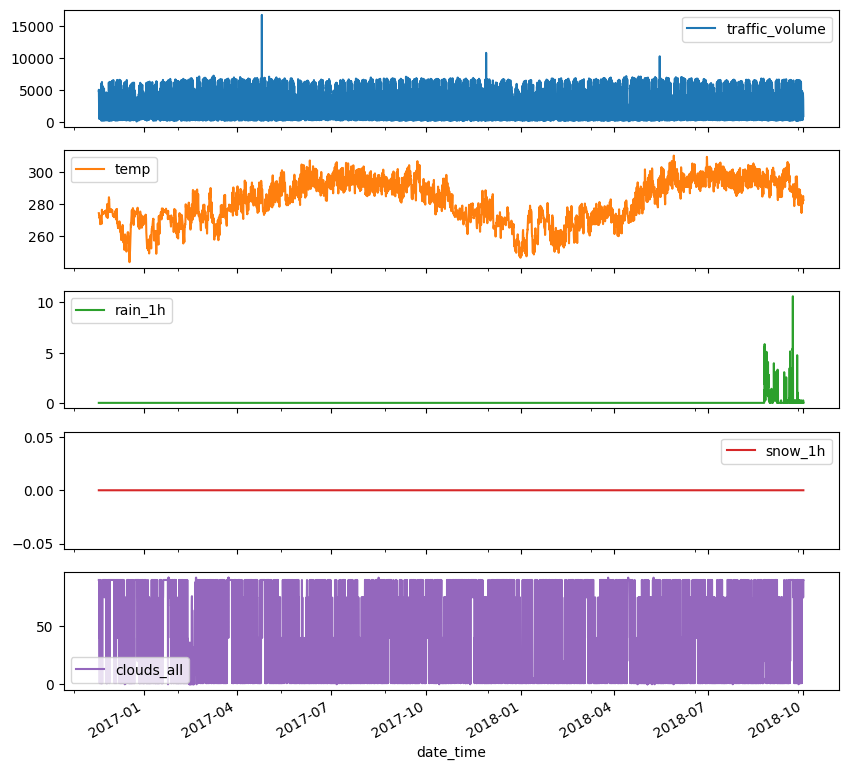

In [199]:
df.plot(figsize=(10,10), subplots=True);

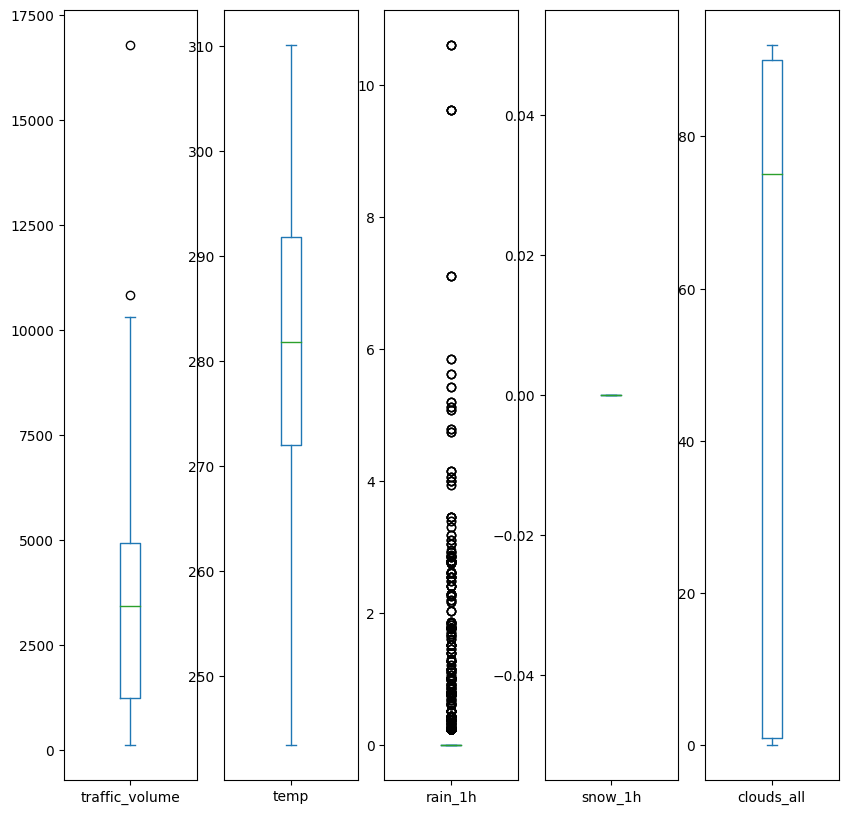

In [200]:
df.plot(figsize=(10,10), subplots=True, kind='box');

In [ ]:
#if i remove outliers the data drop

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [201]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [202]:
df.fillna(method='ffill', inplace=True)

<ipython-input-202-e9443599d05e>:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [203]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [204]:
df.index

DatetimeIndex(['2017-08-27 01:00:00', '2018-09-06 23:00:00',
               '2017-08-25 18:00:00', '2017-11-09 22:00:00',
               '2017-11-09 15:00:00', '2018-06-09 12:00:00',
               '2018-07-26 19:00:00', '2018-08-03 15:00:00',
               '2018-01-10 20:00:00', '2018-08-09 00:00:00',
               ...
               '2017-09-05 05:00:00', '2018-04-06 11:00:00',
               '2018-08-03 23:00:00', '2017-08-10 02:00:00',
               '2017-03-21 07:00:00', '2018-06-06 21:00:00',
               '2017-10-25 15:00:00', '2018-03-28 23:00:00',
               '2018-02-12 15:00:00', '2018-05-31 18:00:00'],
              dtype='datetime64[ns]', name='date_time', length=20000, freq=None)

In [205]:
df.sort_index(inplace=True)

In [206]:
df.index

DatetimeIndex(['2016-11-18 15:00:00', '2016-11-18 15:00:00',
               '2016-11-18 15:00:00', '2016-11-18 16:00:00',
               '2016-11-18 16:00:00', '2016-11-18 16:00:00',
               '2016-11-18 17:00:00', '2016-11-18 17:00:00',
               '2016-11-18 17:00:00', '2016-11-18 18:00:00',
               ...
               '2018-09-30 15:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=20000, freq=None)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [265]:
df['shift_traffic_volume'] = df['traffic_volume'].shift(1)
df['traffic_volume_diff'] = df['traffic_volume'].diff()

In [208]:
df['day_of_week'] = df.index.day_name()
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear

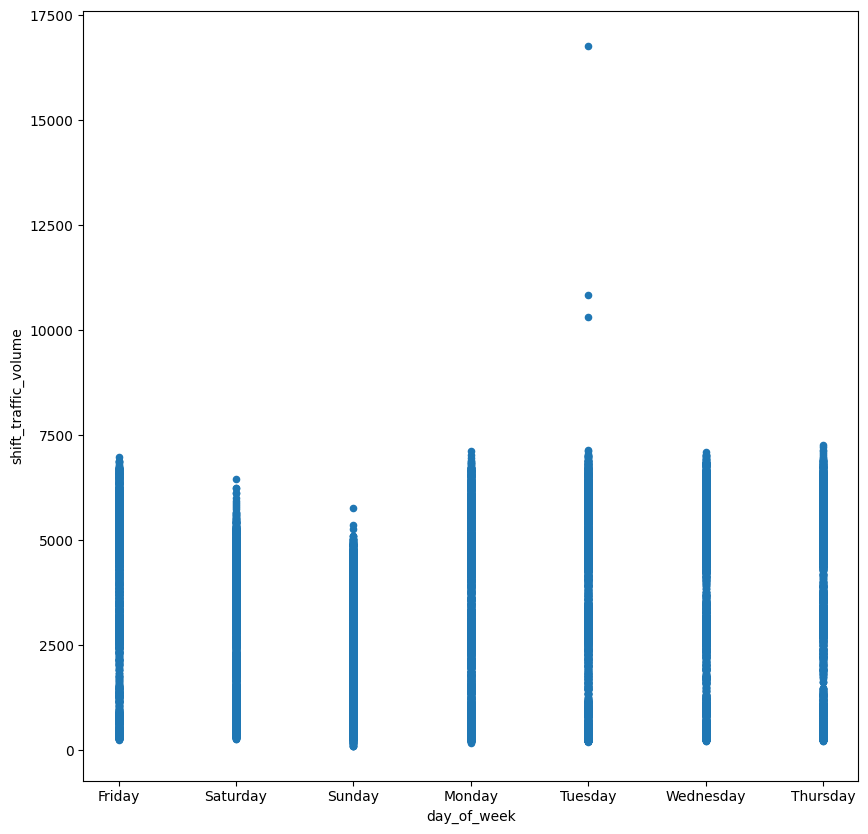

In [209]:
df.plot(figsize=(10,10), subplots=True,kind='scatter',x='day_of_week',y='shift_traffic_volume');

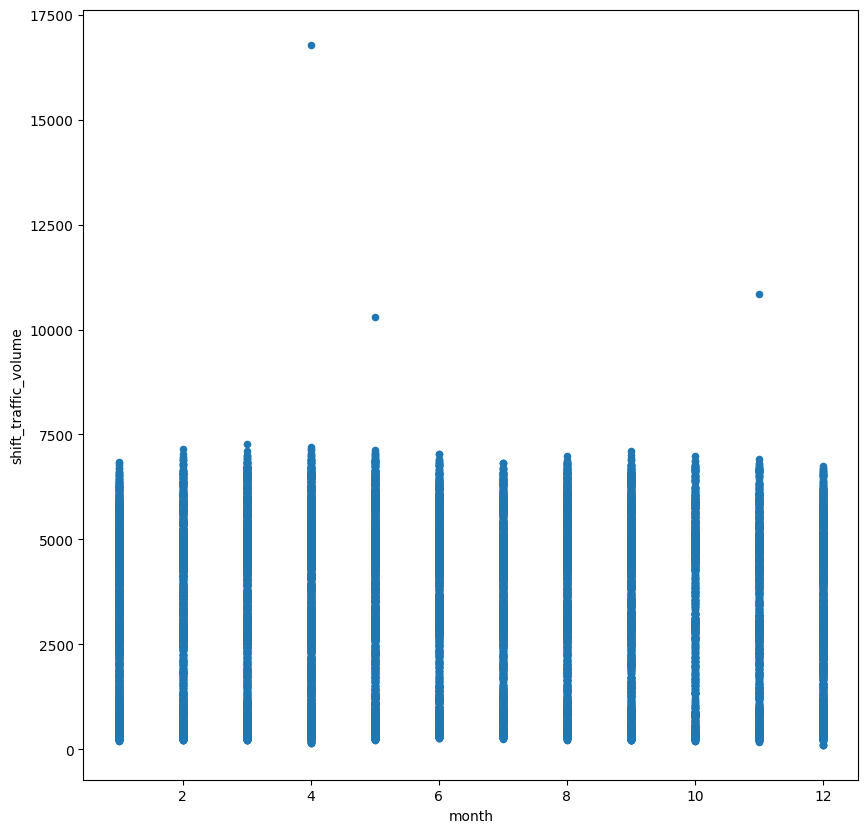

In [210]:
df.plot(figsize=(10,10), subplots=True,kind='scatter',x='month',y='shift_traffic_volume');

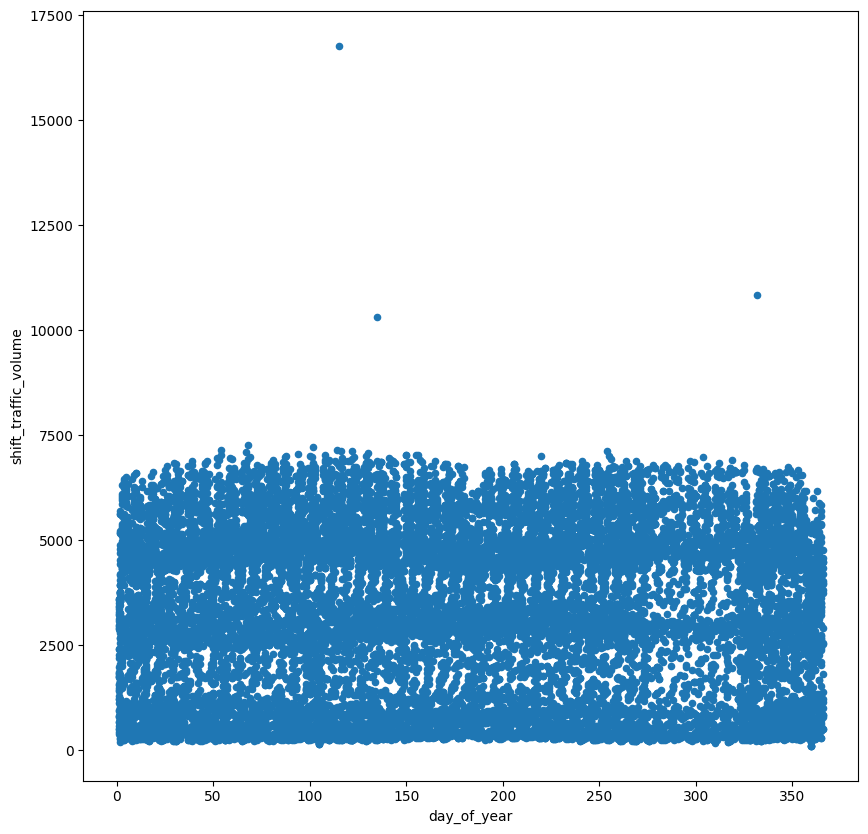

In [211]:
df.plot(figsize=(10,10), subplots=True,kind='scatter',x='day_of_year',y='shift_traffic_volume');

In [212]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
shift_traffic_volume,1
traffic_volume_diff,0
day_of_week,0


In [267]:
df.fillna(method='bfill', inplace=True)

<ipython-input-267-168d8f9d469d>:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [214]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
shift_traffic_volume,0
traffic_volume_diff,0
day_of_week,0


In [272]:
#to show the columns and show diff
df.head(10)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,shift_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
date_time,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4872.0,0.0,Friday,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,4872.0,0.0,Friday,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.0,0.0,Friday,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4872.0,202.0,Friday,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,5074.0,0.0,Friday,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,5074.0,0.0,Friday,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Snow,heavy snow,5074.0,-746.0,Friday,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Mist,mist,4328.0,0.0,Friday,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Fog,fog,4328.0,0.0,Friday,11,323


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [217]:
train = df.loc['2016-11-18 15:00:00':'2017-10-30 15:00:00']
test = df.loc['2017-11-1 15:00:00':'2018-06-30 15:00:00']
val = df.loc['2018-06-16 15:00:00':'2018-09-30 23:00:00']
train.shape, test.shape, val.shape

((10294, 12), (6903, 12), (3184, 12))

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [247]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
scaler = MinMaxScaler()
enc = OrdinalEncoder()


num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(enc)

preprocessing_pipe = make_column_transformer(
     (num_pipe, ['shift_traffic_volume','rain_1h']),
     (cat_pipe, ['weather_main']))

preprocessing_pipe

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['shift_traffic_volume', 'rain_1h']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['weather_main'])])

In [248]:
train_pre = preprocessing_pipe.fit_transform(train)
val_pre = preprocessing_pipe.transform(val)
test_pre = preprocessing_pipe.transform(test)

In [249]:

from tensorflow.keras.utils import timeseries_dataset_from_array

window_size = 24


train_Xy = timeseries_dataset_from_array(train_pre, targets=train_pre[window_size:, 0], sequence_length=window_size, batch_size=258)
val_Xy = timeseries_dataset_from_array(val_pre, targets=val_pre[window_size:, 0], sequence_length=window_size, batch_size=258)
test_Xy = timeseries_dataset_from_array(test_pre, targets=test_pre[window_size:, 0], sequence_length=window_size, batch_size=258)


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [278]:
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

model = Sequential([LSTM(units=10, activation='tanh', return_sequences=True),
                    LSTM(units=10, activation='tanh'),
                    Dense(units=1, activation='relu')])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])



### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [279]:
history = model.fit(train_Xy, validation_data=val_Xy, epochs=15, batch_size=258)


Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - loss: 0.0347 - mae: 0.1526 - val_loss: 0.0169 - val_mae: 0.1067
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0176 - mae: 0.1106 - val_loss: 0.0145 - val_mae: 0.1050
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0137 - mae: 0.1012 - val_loss: 0.0135 - val_mae: 0.1016
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0128 - mae: 0.0980 - val_loss: 0.0126 - val_mae: 0.0978
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0115 - mae: 0.0928 - val_loss: 0.0113 - val_mae: 0.0905
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0101 - mae: 0.0856 - val_loss: 0.0100 - val_mae: 0.0830
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0082 - mae: 0.0755 - val_loss: 0.0086 - val_mae: 0.0740
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0066 - mae: 0.0649 - val_loss: 0.0071 - val_mae: 0.0640
Epoch 9/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.00

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [280]:
X_val, y_val = next(iter(val_Xy))
X_val.shape, y_val.shape

(TensorShape([258, 24, 3]), TensorShape([258]))

In [281]:
y_pred = model.predict(X_val)
y_pred.shape

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


(258, 1)

In [282]:
#y_pred

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [283]:
model.evaluate(test_Xy)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0031 - mae: 0.0424


[0.0031221569515764713, 0.04241868481040001]

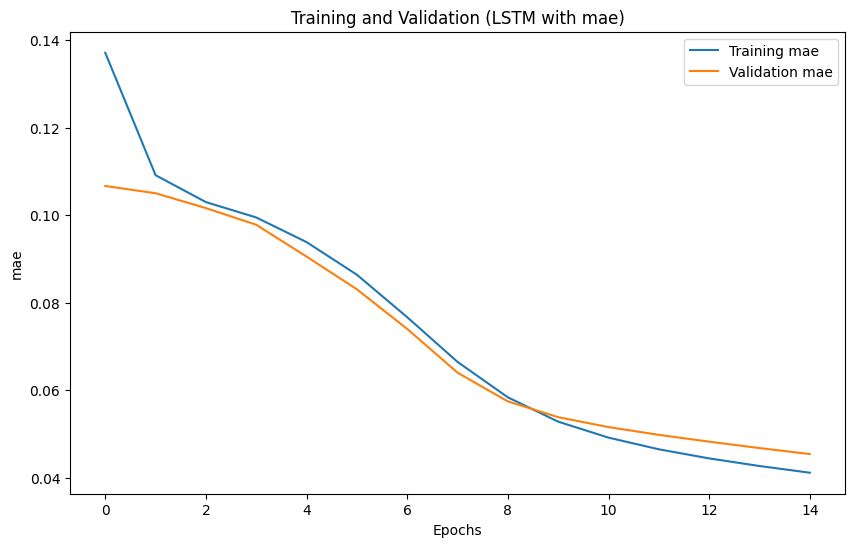

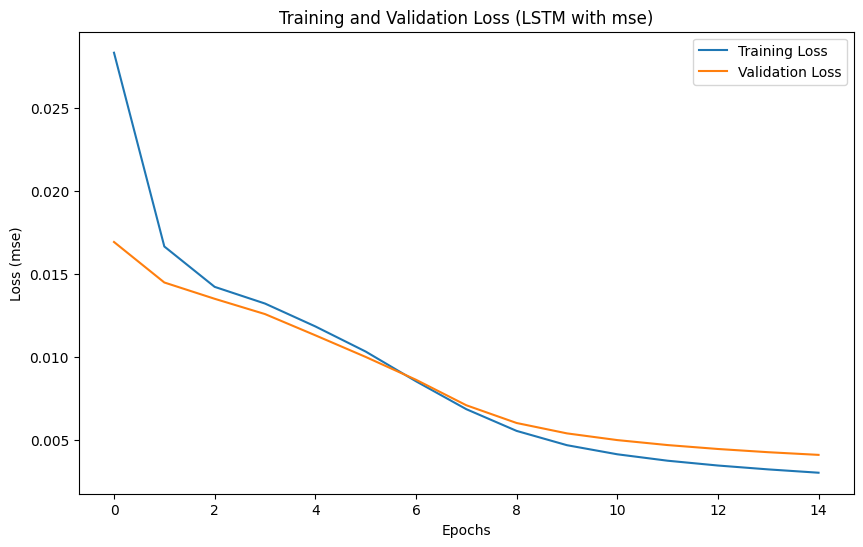

In [284]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training mae')
plt.plot(history.history['val_mae'], label='Validation mae')
plt.title('Training and Validation (LSTM with mae)')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (LSTM with mse)')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend(loc='upper right')
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [291]:

model = Sequential([GRU(units=10, activation='tanh'),
                    Dense(units=1, activation='relu')])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])



### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [292]:
history = model.fit(train_Xy, validation_data=val_Xy, epochs=10, batch_size=258)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.3888 - mae: 0.4932 - val_loss: 0.0516 - val_mae: 0.1922
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0558 - mae: 0.1989 - val_loss: 0.0447 - val_mae: 0.1803
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0400 - mae: 0.1662 - val_loss: 0.0438 - val_mae: 0.1783
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0393 - mae: 0.1645 - val_loss: 0.0429 - val_mae: 0.1762
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0382 - mae: 0.1622 - val_loss: 0.0410 - val_mae: 0.1721
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0361 - mae: 0.1576 - val_loss: 0.0363 - val_mae: 0.1606
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0327 - mae: 0.1492 - val_loss: 0.0315 - val_mae: 0.1472
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0268 - mae: 0.1334 - val_loss: 0.0183 - val_mae: 0.1103
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [293]:
model.evaluate(test_Xy)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0102 - mae: 0.0859


[0.010358921252191067, 0.08696147054433823]

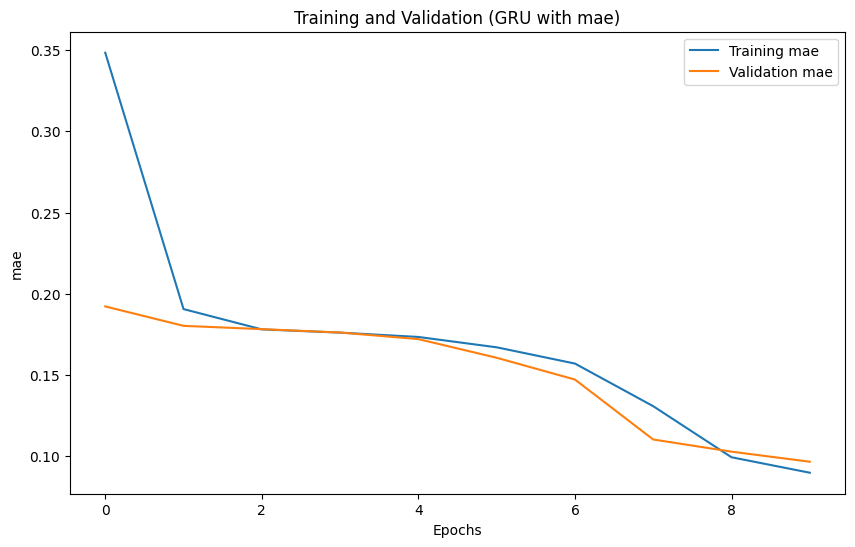

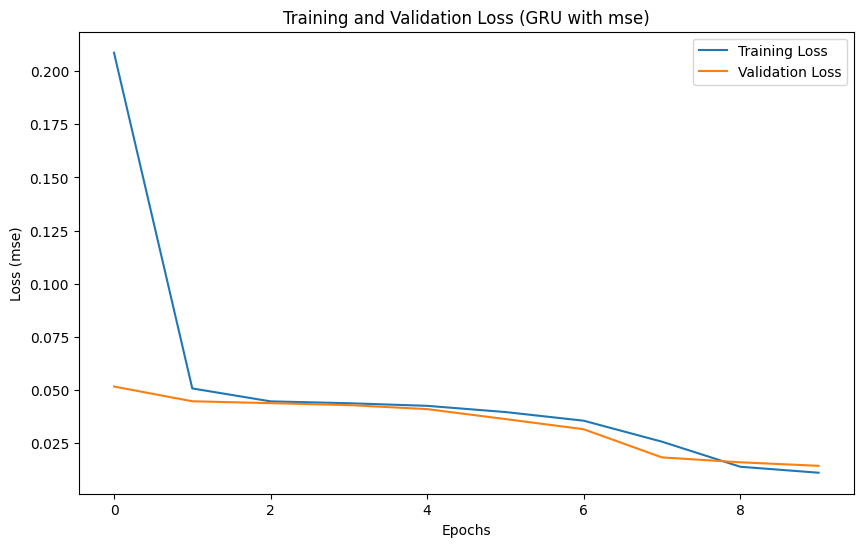

In [294]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training mae')
plt.plot(history.history['val_mae'], label='Validation mae')
plt.title('Training and Validation (GRU with mae)')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (GRU with mse)')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend(loc='upper right')
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:
## Project Questions:

1. **Data Preprocessing**:
I use backfowred and forword to fill missing values
for target and for new columns i created

2. **Feature Engineering**:
yes i create new one for target with shift
3. **Model Architecture**:
i use two models the:
first one is LSTM two layers and one output number of neurons is 10
scande one is GRU one layers and one output number of neurons is 10
4. **Training Process**:
batch size i used 64 but gitting overfitting after that i try 258
number of epochs 15 in LSTM and in GRU used 10 epochs
i used adam for optimizer

5. **Loss Function and Metrics**:
i use MSE for loss function and metrics MAE

6. **Model Tuning (If Done)**:

7. **Overfitting and Underfitting**:
in LSTM IS GOOD model no Overfitting or Underfitting
and in GRU its same no Overfitting or Underfitting
but i think so in evaluate tow model (Take a look in figuers) the LSTM is better than GRU

8. **Future Improvements**:
mabey show new feature engineering to soloved and git bitter fit
or try use ARIMA i don't thnik so its goof model for this dataset but i will try this model and try SampleRNN and comparison bettwen all models
mabey add hyperparameters like erlay stoping and encreas number of epochs and add cheak point to get the best fit in trainnig  